<a href="https://colab.research.google.com/github/Nikhil-S15/E-commerce/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import copy
import torch
import torch.optim as opt

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Define paths for training and testing data
train_path = '/content/training/'
test_path = '/content/testing'

# Move images to appropriate folders based on filename
paths = [train_path, test_path]
for path in paths:
    if not os.path.exists(os.path.join(path, 'Smoking')):
        os.makedirs(os.path.join(path, 'Smoking'))
    if not os.path.exists(os.path.join(path, 'NotSmoking')):
        os.makedirs(os.path.join(path, 'NotSmoking'))
    for filename in os.listdir(path):
        if os.path.isfile(os.path.join(path, filename)):
            if filename[:7] == 'smoking':
                os.rename(os.path.join(path, filename), os.path.join(path, 'Smoking', filename))
            else:
                os.rename(os.path.join(path, filename), os.path.join(path, 'NotSmoking', filename))

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((251, 251)),
    transforms.ToTensor(),
])

# Load datasets
# train_dataset = ImageFolder(train_path, transform=transform)
# test_dataset = ImageFolder(test_path, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
num_classes = 3
batch_size = 4

In [ ]:
def imshow(img, title):
    npimg = img.numpy() / 2 + 0.5
    plt.figure(figsize=(batch_size, 1))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [ ]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

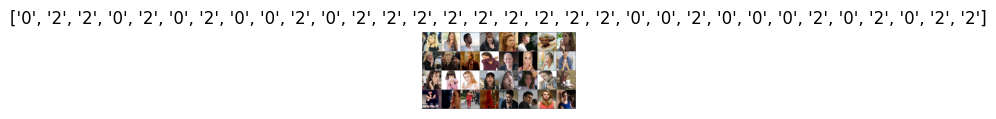

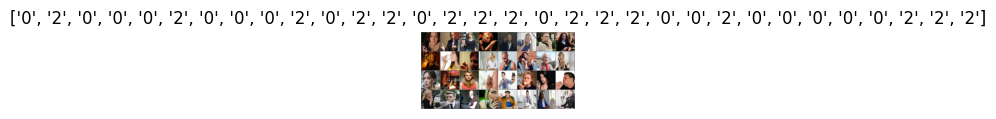

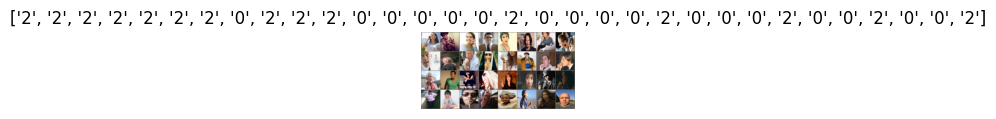

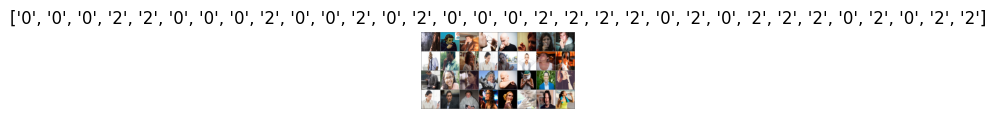

In [ ]:
for i in range(4):
    show_batch_images(train_loader)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
resnet = models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 156MB/s]


In [ ]:
for param in resnet.parameters():
    param.requires_grad = False

In [ ]:
in_features = resnet.fc.in_features
resnet.fc = nn.Linear(in_features, num_classes)

In [ ]:
for param in resnet.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([3, 512])
torch.Size([3])


In [ ]:
resnet = resnet.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(resnet.parameters(), lr=0.01)

In [ ]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

Min loss 1.37
Iteration: 0/12500, Loss: 1.37
Min loss 0.94
Min loss 0.80
Min loss 0.74
Min loss 0.68
Min loss 0.58
Min loss 0.47
Epoch: 0/10, Test acc: 52.23, Train acc: 64.80
Iteration: 0/12500, Loss: 0.75
Min loss 0.38
Min loss 0.38
Epoch: 1/10, Test acc: 55.80, Train acc: 72.77
Iteration: 0/12500, Loss: 0.45
Min loss 0.34
Min loss 0.29
Epoch: 2/10, Test acc: 51.34, Train acc: 68.16
Iteration: 0/12500, Loss: 0.90
Epoch: 3/10, Test acc: 50.45, Train acc: 60.75
Iteration: 0/12500, Loss: 1.24
Min loss 0.23
Epoch: 4/10, Test acc: 55.36, Train acc: 80.03
Iteration: 0/12500, Loss: 0.31
Epoch: 5/10, Test acc: 54.02, Train acc: 74.58
Iteration: 0/12500, Loss: 0.57
Epoch: 6/10, Test acc: 57.59, Train acc: 84.78
Iteration: 0/12500, Loss: 0.44
Epoch: 7/10, Test acc: 56.70, Train acc: 78.91
Iteration: 0/12500, Loss: 0.28
Epoch: 8/10, Test acc: 54.46, Train acc: 70.53
Iteration: 0/12500, Loss: 0.85
Min loss 0.21
Epoch: 9/10, Test acc: 54.02, Train acc: 69.83


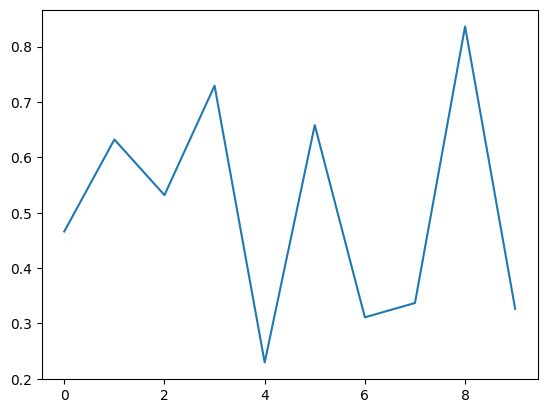

In [ ]:
import numpy as np
import copy

loss_epoch_arr = []
max_epochs = 10

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = resnet(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(resnet.state_dict())
            print('Min loss %0.2f' % min_loss)

        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))

        del inputs, labels, outputs
        torch.cuda.empty_cache()

    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs,
        evaluation(test_loader, resnet), evaluation(train_loader, resnet)))

plt.plot(loss_epoch_arr)
plt.show()


VGG


In [ ]:
vgg = models.vgg16_bn()

In [ ]:
# Retrieve the number of input features to the last fully connected layer of the VGG model's classifier
final_in_features = vgg.classifier[6].in_features

# Extract all the layers of the VGG model's classifier except the last fully connected layer and convert them into a list
mod_classifier = list(vgg.classifier.children())[:-1]

# Append a new fully connected layer to the list of layers extracted earlier, with final_in_features as the number of input features and num_classes as the number of output features
mod_classifier.extend([nn.Linear(final_in_features, num_classes)])

# Print the modified classifier, now represented as a list of layers
print(mod_classifier)


[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=3, bias=True)]


In [ ]:
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
batch_size = 16

In [ ]:
def evaluation(dataloader, model):
    # Initialize variables to store total and correctly classified samples
    total, correct = 0, 0

    # Iterate over the dataloader
    for data in dataloader:
        # Get inputs and labels from the data batch
        inputs, labels = data
        # Move inputs and labels to the appropriate device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)
        # Forward pass: compute predictions
        outputs = model(inputs)
        # Get the index of the maximum value along the second dimension (class prediction)
        _, pred = torch.max(outputs.data, 1)
        # Update total count
        total += labels.size(0)
        # Update correct count by summing the number of correct predictions
        correct += (pred == labels).sum().item()

    # Calculate accuracy as the percentage of correctly classified samples
    return 100 * correct / total


In [ ]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

Iteration: 0/3125, Loss: 1.07
Epoch: 0/10, Test acc: 53.57, Train acc: 45.95
Iteration: 0/3125, Loss: 1.07
Epoch: 1/10, Test acc: 44.64, Train acc: 58.10
Iteration: 0/3125, Loss: 0.97
Epoch: 2/10, Test acc: 48.21, Train acc: 49.72
Iteration: 0/3125, Loss: 0.78
Epoch: 3/10, Test acc: 48.21, Train acc: 61.73
Iteration: 0/3125, Loss: 0.66
Epoch: 4/10, Test acc: 52.23, Train acc: 69.13
Iteration: 0/3125, Loss: 0.85
Epoch: 5/10, Test acc: 46.43, Train acc: 60.89
Iteration: 0/3125, Loss: 0.87
Epoch: 6/10, Test acc: 54.02, Train acc: 70.53
Iteration: 0/3125, Loss: 0.51
Epoch: 7/10, Test acc: 52.23, Train acc: 75.00
Iteration: 0/3125, Loss: 0.32
Epoch: 8/10, Test acc: 56.70, Train acc: 65.92
Iteration: 0/3125, Loss: 0.54
Epoch: 9/10, Test acc: 53.57, Train acc: 66.62


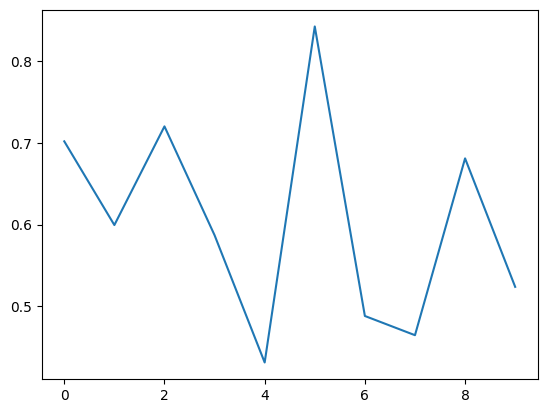

In [ ]:
loss_epoch_arr = []  # List to store loss values for each epoch
max_epochs = 10  # Maximum number of epochs

# Calculate the number of iterations per epoch
n_iters = np.ceil(50000 / batch_size)

# Loop through each epoch
for epoch in range(max_epochs):

    # Iterate through the batches in the trainloader
    for i, data in enumerate(trainloader, 0):

        # Extract inputs and labels from the batch
        inputs, labels = data
        # Move inputs and labels to the appropriate device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Clear the gradients of all optimized variables
        opt.zero_grad()

        # Forward pass: compute predictions
        outputs = vgg(inputs)
        # Compute the loss
        loss = loss_fn(outputs, labels)
        # Backward pass: compute gradients
        loss.backward()
        # Update model parameters
        opt.step()

        # Clear memory
        del inputs, labels, outputs
        torch.cuda.empty_cache()

        # Print iteration number and loss every 100 iterations
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))

    # Append the loss of the last batch to loss_epoch_arr
    loss_epoch_arr.append(loss.item())

    # Print epoch number and evaluation metrics
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs,
        evaluation(testloader, vgg), evaluation(trainloader, vgg)))

# Plot the loss curve
plt.plot(loss_epoch_arr)
plt.show()


LeNet


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Define paths for training and testing data
train_path = '/content/training/'
test_path = '/content/testing'

# Move images to appropriate folders based on filename
paths = [train_path, test_path]
for path in paths:
    if not os.path.exists(os.path.join(path, 'Smoking')):
        os.makedirs(os.path.join(path, 'Smoking'))
    if not os.path.exists(os.path.join(path, 'NotSmoking')):
        os.makedirs(os.path.join(path, 'NotSmoking'))
    for filename in os.listdir(path):
        if os.path.isfile(os.path.join(path, filename)):
            if filename[:7] == 'smoking':
                os.rename(os.path.join(path, filename), os.path.join(path, 'Smoking', filename))
            else:
                os.rename(os.path.join(path, filename), os.path.join(path, 'NotSmoking', filename))

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((251, 251)),
    transforms.ToTensor(),
])

# Load datasets
train_dataset = ImageFolder(train_path, transform=transform)
test_dataset = ImageFolder(test_path, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
num_classes = 3
batch_size = 4

In [ ]:
def imshow(img, title):
    npimg = img.numpy() / 2 + 0.5
    plt.figure(figsize=(batch_size, 1))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [ ]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

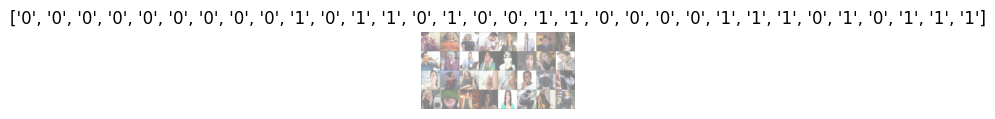

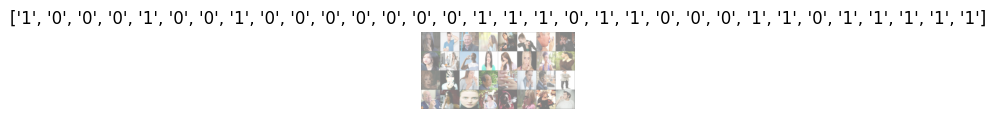

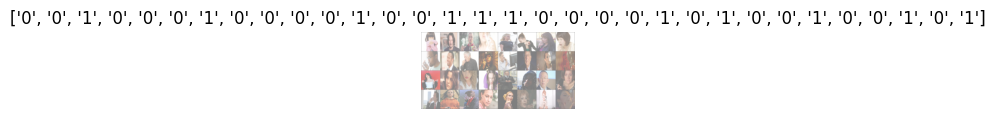

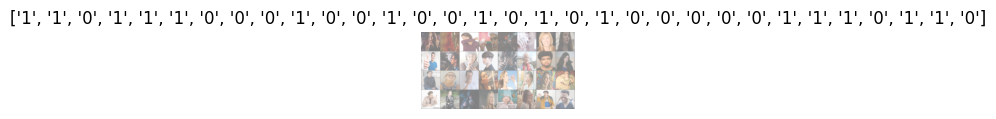

In [ ]:
for i in range(4):
    show_batch_images(train_loader)


In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # Define the CNN part of the model
        self.cnn_model = nn.Sequential(
            # First convolutional layer
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            # First average pooling layer
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            # Second convolutional layer
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.Tanh(),
            # Second average pooling layer
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        # Define the fully connected (FC) part of the model
        self.fc_model = nn.Sequential(
            # First fully connected layer
            nn.Linear(11664,120),         # (N, 11664) -> (N, 120)
            nn.Tanh(),
            # Second fully connected layer
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            # Third fully connected layer
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )

    def forward(self, x):
        # Forward pass through the CNN part of the model
        x = self.cnn_model(x)
        # Flatten the output tensor
        x = x.view(x.size(0), -1)
        # Forward pass through the fully connected (FC) part of the model
        x = self.fc_model(x)
        return x


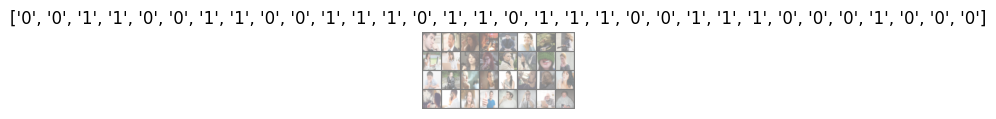

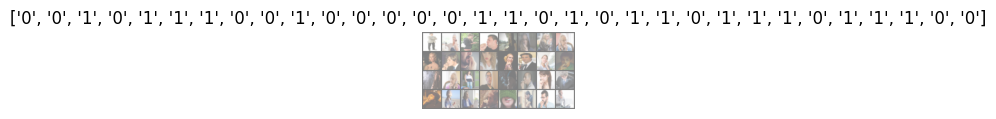

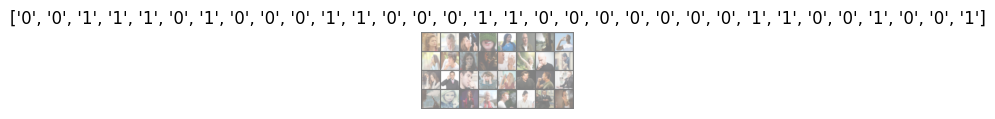

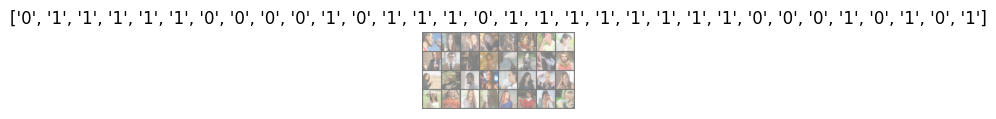

tensor([[ 0.0898, -0.1110],
        [ 0.0955, -0.0687],
        [ 0.0902, -0.1024],
        [ 0.0946, -0.1060],
        [ 0.0855, -0.0982],
        [ 0.0937, -0.1131],
        [ 0.1076, -0.0875],
        [ 0.0941, -0.0979],
        [ 0.1121, -0.0917],
        [ 0.0978, -0.1125],
        [ 0.0881, -0.0484],
        [ 0.0899, -0.0574],
        [ 0.0835, -0.0718],
        [ 0.0899, -0.0827],
        [ 0.0986, -0.0706],
        [ 0.0983, -0.0851],
        [ 0.0905, -0.0638],
        [ 0.0809, -0.0843],
        [ 0.0854, -0.0770],
        [ 0.0909, -0.0810],
        [ 0.0829, -0.0839],
        [ 0.0932, -0.0663],
        [ 0.1051, -0.1042],
        [ 0.1013, -0.0837],
        [ 0.0905, -0.0643],
        [ 0.0855, -0.0731],
        [ 0.0850, -0.0547],
        [ 0.0905, -0.1008],
        [ 0.0892, -0.0887],
        [ 0.0887, -0.0778],
        [ 0.0813, -0.0675],
        [ 0.0909, -0.1232]], grad_fn=<AddmmBackward0>)


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

# Define paths for training and testing data
train_path = '/content/training/'
test_path = '/content/testing/'

# Move images to appropriate folders based on filename
paths = [train_path, test_path]
for path in paths:
    if not os.path.exists(os.path.join(path, 'Smoking')):
        os.makedirs(os.path.join(path, 'Smoking'))
    if not os.path.exists(os.path.join(path, 'NotSmoking')):
        os.makedirs(os.path.join(path, 'NotSmoking'))
    for filename in os.listdir(path):
        if os.path.isfile(os.path.join(path, filename)):
            if filename[:7] == 'smoking':
                os.rename(os.path.join(path, filename), os.path.join(path, 'Smoking', filename))
            else:
                os.rename(os.path.join(path, filename), os.path.join(path, 'NotSmoking', filename))

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

# Load datasets
train_dataset = ImageFolder(train_path, transform=transform)
test_dataset = ImageFolder(test_path, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

def imshow(img, title):
    npimg = img.numpy() / 2 + 0.5
    plt.figure(figsize=(batch_size, 1))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

# Show batch images
batch_size = 4
for i in range(4):
    show_batch_images(train_loader)

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # Define the CNN part of the model
        self.cnn_model = nn.Sequential(
            # First convolutional layer
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            # First average pooling layer
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            # Second convolutional layer
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.Tanh(),
            # Second average pooling layer
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        # Define the fully connected (FC) part of the model
        self.fc_model = nn.Sequential(
            # First fully connected layer
            nn.Linear(16*5*5,120),         # (N, 16*5*5) -> (N, 120)
            nn.Tanh(),
            # Second fully connected layer
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            # Third fully connected layer
            nn.Linear(84,2)            # (N, 84)  -> (N, 2)
        )

    def forward(self, x):
        # Forward pass through the CNN part of the model
        x = self.cnn_model(x)
        # Flatten the output tensor
        x = x.view(x.size(0), -1)
        # Forward pass through the fully connected (FC) part of the model
        x = self.fc_model(x)
        return x

# Initialize your LeNet model
net = LeNet()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Pass the images through the network
out = net(images)
print(out)



In [ ]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


In [ ]:
batch_size = 128

In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
net = LeNet()
import torch.optim as optim

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
opt = optim.Adam(net.parameters())

#  These lines prepare the loss function and optimizer for training the neural network.


Epoch: 0/16, Test acc: 71.43, Train acc: 74.16
Epoch: 1/16, Test acc: 70.54, Train acc: 74.02
Epoch: 2/16, Test acc: 72.32, Train acc: 74.30
Epoch: 3/16, Test acc: 72.77, Train acc: 75.28
Epoch: 4/16, Test acc: 73.66, Train acc: 76.12
Epoch: 5/16, Test acc: 72.32, Train acc: 76.82
Epoch: 6/16, Test acc: 74.55, Train acc: 76.68
Epoch: 7/16, Test acc: 71.43, Train acc: 74.44
Epoch: 8/16, Test acc: 74.55, Train acc: 76.26
Epoch: 9/16, Test acc: 72.77, Train acc: 77.37
Epoch: 10/16, Test acc: 74.11, Train acc: 78.21
Epoch: 11/16, Test acc: 75.89, Train acc: 78.63
Epoch: 12/16, Test acc: 72.77, Train acc: 76.68
Epoch: 13/16, Test acc: 72.77, Train acc: 78.77
Epoch: 14/16, Test acc: 74.11, Train acc: 77.79
Epoch: 15/16, Test acc: 74.11, Train acc: 79.05


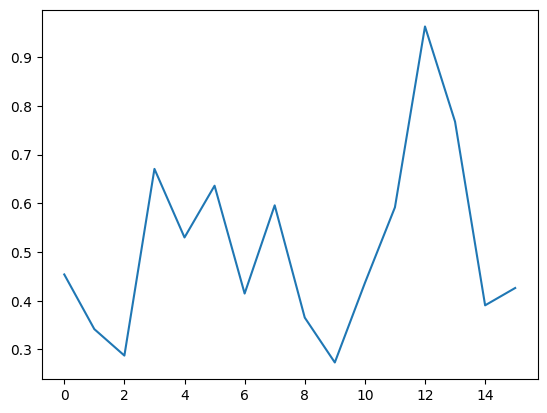

CPU times: user 52.3 s, sys: 1.27 s, total: 53.6 s
Wall time: 54.5 s


In [ ]:
%%time

#  Initializing lists to store loss values
loss_arr = []
loss_epoch_arr = []

# Setting the number of epochs for training
max_epochs = 16

#  Looping over each epoch
for epoch in range(max_epochs):

    #  Iterating over batches in the training data loader
    for i, data in enumerate(train_loader, 0):

        #  Extracting inputs and labels from the batch
        inputs, labels = data

        # Zeroing out the gradients to avoid accumulation
        opt.zero_grad()

        #  Forward pass: computing predictions
        outputs = net(inputs)

        #  Computing the loss between predictions and true labels
        loss = loss_fn(outputs, labels)

        #  Backward pass: computing gradients
        loss.backward()

        #  Updating model parameters using optimizer
        opt.step()

        #  Appending current batch loss to the list
        loss_arr.append(loss.item())

    #  Appending loss of last batch of current epoch to the list
    loss_epoch_arr.append(loss.item())

    #  Printing epoch number and evaluation metrics
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(test_loader), evaluation(train_loader)))

# Plotting the training loss over epochs
plt.plot(loss_epoch_arr)
plt.show()



**Resent with Data Augmentation**
---



In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import torchvision.models as models
import copy

# Define paths for training and testing data
train_path = '/content/training/'
test_path = '/content/testing/'

# Move images to appropriate folders based on filename
paths = [train_path, test_path]
for path in paths:
    if not os.path.exists(os.path.join(path, 'Smoking')):
        os.makedirs(os.path.join(path, 'Smoking'))
    if not os.path.exists(os.path.join(path, 'NotSmoking')):
        os.makedirs(os.path.join(path, 'NotSmoking'))
    for filename in os.listdir(path):
        if os.path.isfile(os.path.join(path, filename)):
            if filename[:7] == 'smoking':
                os.rename(os.path.join(path, filename), os.path.join(path, 'Smoking', filename))
            else:
                os.rename(os.path.join(path, filename), os.path.join(path, 'NotSmoking', filename))

# Define data transformations with augmentation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load datasets
train_dataset = ImageFolder(train_path, transform=train_transform)
test_dataset = ImageFolder(test_path, transform=test_transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

def evaluation(dataloader, model):
    model.eval()
    total, correct = 0, 0
    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Initialize ResNet model
resnet = models.resnet18(pretrained=True)
for param in resnet.parameters():
    param.requires_grad = False

# Replace the fully connected layer
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 2)

# Move model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet = resnet.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(), lr=0.001, momentum=0.9)

# Training the model
num_epochs = 10
best_acc = 0.0
best_model_wts = copy.deepcopy(resnet.state_dict())

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

    # Evaluate model after each epoch
    train_acc = evaluation(train_loader, resnet)
    test_acc = evaluation(test_loader, resnet)

    print('Epoch [{}/{}], Train Accuracy: {:.2f}%, Test Accuracy: {:.2f}%'.format(epoch+1, num_epochs, train_acc*100, test_acc*100))

    # Save the model with best accuracy on the test set
    if test_acc > best_acc:
        best_acc = test_acc
        best_model_wts = copy.deepcopy(resnet.state_dict())

print('Finished Training')

# Load best model weights
resnet.load_state_dict(best_model_wts)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 143MB/s]


Epoch [1/10], Train Accuracy: 67.04%, Test Accuracy: 72.77%
Epoch [2/10], Train Accuracy: 71.51%, Test Accuracy: 72.32%
Epoch [3/10], Train Accuracy: 80.73%, Test Accuracy: 85.27%
Epoch [4/10], Train Accuracy: 79.75%, Test Accuracy: 86.16%
Epoch [5/10], Train Accuracy: 79.19%, Test Accuracy: 81.70%
Epoch [6/10], Train Accuracy: 82.12%, Test Accuracy: 86.61%
Epoch [7/10], Train Accuracy: 80.87%, Test Accuracy: 86.16%
Epoch [8/10], Train Accuracy: 81.98%, Test Accuracy: 83.93%
Epoch [9/10], Train Accuracy: 81.70%, Test Accuracy: 85.71%
Epoch [10/10], Train Accuracy: 83.52%, Test Accuracy: 86.61%
Finished Training


<All keys matched successfully>